In [54]:
import os
import os.path

In [55]:
os.chdir(os.path.expanduser(os.path.join('~', 'p', 'smqtk', 'docker')))
!echo current directory: $(pwd)
!echo
image_directory = os.path.join('leedsbutterfly', 'images')
!echo {image_directory}
!echo
!ls {image_directory} 2> /dev/null | head | sed -re 's/^/    /g'

current directory: /home/opadron/p/smqtk/docker

leedsbutterfly/images

    001_0001.jpg
    001_0002.jpg
    001_0003.jpg
    001_0004.jpg
    001_0005.jpg
    001_0006.jpg
    001_0007.jpg
    001_0008.jpg
    001_0009.jpg
    001_0010.jpg


In [56]:
!./smqtk_services.run_images.sh -i './{image_directory}'

smqtk-postgres is up-to-date
Waiting for a responsive database
Creating required tables
Starting SMQTK Services docker
smqtk-postgres is up-to-date
docker_smqtk_1 is up-to-date
docker_wrapper_1 is up-to-date


In [76]:
!docker-compose logs smqtk | tail

smqtk_1     |   DEBUG - 2017-06-21 16:56:48,053 - smqtk.representation.descriptor_index.postgres.PostgresDescriptorIndex._batch_execute - -- done
smqtk_1     |   DEBUG - 2017-06-21 16:56:48,054 - smqtk.compute_functions.compute_many_descriptors - yielding generated elements
smqtk_1     |   DEBUG - 2017-06-21 16:56:48,059 - __main__.report_progress - Loops per second 168900.872562 (avg 168900.872562) (832 this interval / 832 total)
smqtk_1     |    INFO - 2017-06-21 16:56:48,060 - __main__.run_file_list - Done
smqtk_1     | #####################
smqtk_1     | # Build FLANN index #
smqtk_1     | #####################
smqtk_1     | Starting NN Service
smqtk_1     | Starting IQR service
smqtk_1     | Ctrl-C to exit or run 'docker stop <container>


In [77]:
import requests
requests.get('http://localhost:12345/count').json()

{'count': 832}

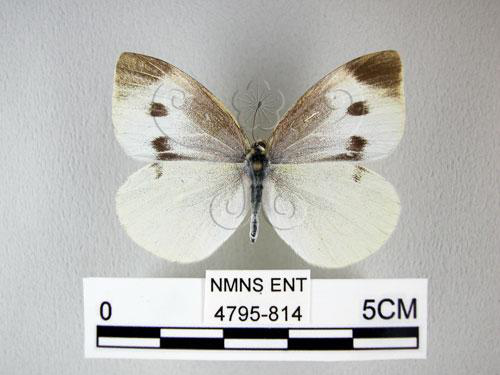

In [78]:
query_url = 'http://localhost:12345/image/b9de1f8af1093ecc1f49da847d3f1ce686f70c99'
req = requests.get(query_url)

from PIL import Image
from io import BytesIO
I = Image.open(BytesIO(req.content))
I

In [79]:
req = requests.get('http://localhost:12345/nn/' + query_url)
result = req.json()

from pprint import pprint as pp
pp(result)

{'distances': [0.0,
               6601.052439538724,
               6947.799251718096,
               6968.659682373035,
               7114.1123074948355,
               7176.3759700439905,
               7205.433966443346,
               7579.987936042794,
               7649.558332529889,
               7698.211887101173],
 'message': 'descriptor computed',
 'neighbors': ['b9de1f8af1093ecc1f49da847d3f1ce686f70c99',
               '21f52613795eadcfceb87b5c3f2d70c096ef5858',
               '9062e4c9d2ece77d7c242511ce2177788356f6b6',
               '0526cc0ef3d987a955a8a67a0754ca1371c65e69',
               '22e03c9eef0b5cbd94ec22a56874490ac4918a44',
               '41a4cc942e0cc5fbb0cbd1e850f9353fe33ee73d',
               '2f4b14bf0efa57c74c9f0554272321bcc99a9416',
               '4e2cb67fe6fb8cb53328f7431e1ce63846ae4c37',
               '7b2b73a865acecfb51145baafa0bdbc914f9500a',
               '94694bbf64a5f83d086dba7dd61ea32efd8af7fe'],
 'reference_uri': 'http://wrapper:12345/image

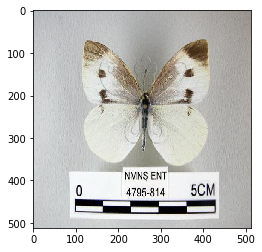

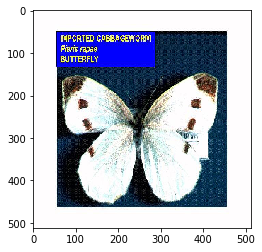

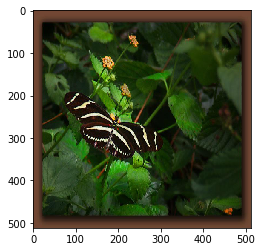

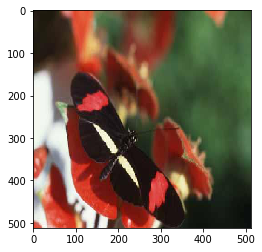

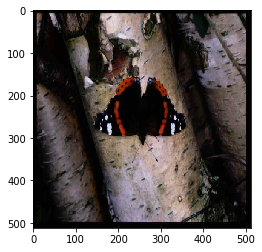

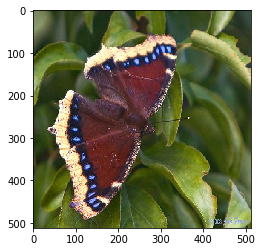

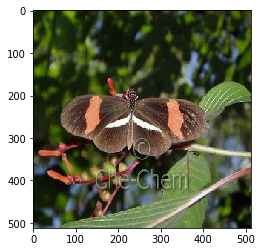

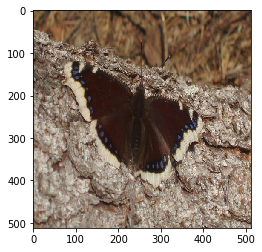

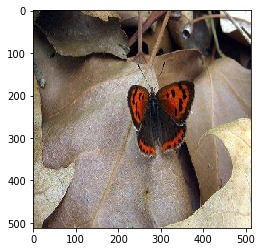

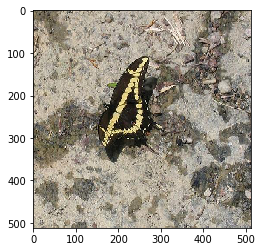

In [80]:
import numpy as np
from matplotlib import pyplot
from matplotlib.pyplot import imshow

figs = []

for index, neighbor in enumerate(result['neighbors']):
    req = requests.get('http://localhost:12345/image/' + neighbor)
    I = Image.open(BytesIO(req.content))
    fig = pyplot.figure()
    fig.gca().imshow(np.asarray(I.resize((512, 512))))
    figs.append(fig)
    
pyplot.show(figs)
for fig in figs:
    fig.clear()
del figs
    

In [81]:
!docker-compose down

Stopping docker_wrapper_1 ... 
Stopping docker_smqtk_1 ... 
Stopping smqtk-postgres ... 
Removing docker_wrapper_1 ... one0m
Removing docker_smqtk_1 ... 
Removing smqtk-postgres ... 
Removing network docker_defaultne0m
